### Nombre: Diego Armando Vallejo Vinueza

### Caso de Estudio Complexivo: Segmentación de Solicitantes de Refugio
### Fecha de Entrega: 26/10/2023

### Data para el caso: https://www.datosabiertos.gob.ec/dataset/registro-movilidadhumana-solicitantes-de-refugio/resource/ab79a1ff-2bd5-4bd1-a9fe-41ce5306dcfc

#### Problemática: El Ministerio de Relaciones Exteriores y Movilidad Humana (MREMH) dispone de información sobre las personas solicitantes de protección internacional bajo la figura de refugio que desean venir al país. La base de datos es amplia y se encuentra disponible en formato CSV en el enlace: https://www.datosabiertos.gob.ec/dataset/registro-movilidad-humana-solicitantes-derefugio/resource/ab79a1ff-2bd5-4bd1-a9fe-41ce5306dcfc. El MREMH ha recibido un requerimiento del gobierno central para identificar grupos o segmentos de acuerdo con las características de los solicitantes. Esto con la finalidad de tomar acciones de mejora

#### Objetivos: 
#### Realizar un análisis exploratorio de la base de datos provista e identificar las características más relevantes para implementar un modelo de segmentación de la población de solicitantes
#### Aplicar técnicas de ETL (Extract Transform and Load) para obtener los conjuntos de datos necesarios para el entrenamiento
#### Crear un modelo de segmentación con técnicas de Machine Learning que permita identificar características en común entre los solicitantes.
#### Describir las características de los grupos o segmentos identificados

### Proceso de Solución Planteada usando el Lenguaje Python:

### 1.- ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
#Importación de Librerías necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

# 1. Cargar los datos desde el archivo CSV al cual se ha llamado: dataSR2023.csv
data = pd.read_csv('dataSR2023.csv', delimiter=';', encoding='ISO-8859-1')
data

,Fecha de creación,Ubicación,Estatus Legal,Genero,Fecha de Nacimiento,Grupo Etario,Edad,País de Origen,Estado Civil
0,3/7/2023,Pichincha,Otro de interés,Femenino,27/11/1987,4.- adulto,35,Venezuela,Soltero(a)
1,3/7/2023,Pichincha,Otro de interés,Femenino,1/3/2001,3.- jovenes,22,Colombia,Soltero(a)
2,3/7/2023,Pichincha,Otro de interés,Femenino,7/3/2023,"1.- niños, niñas",0,Colombia,Soltero(a)
3,3/7/2023,Azogues,No de interés,Masculino,29/6/1963,4.- adulto,60,Venezuela,Unión de hecho
4,3/7/2023,Pichincha,Otro de interés,Femenino,4/2/1999,3.- jovenes,24,Venezuela,Soltero(a)
...,...,...,...,...,...,...,...,...,...
3455,29/9/2023,Guayaquil,Otro de interés,Masculino,25/4/2010,2.- adolescentes,13,Venezuela,Soltero(a)
3456,29/9/2023,Guayaquil,Otro de interés,Masculino,22/1/2016,"1.- niños, niñas",7,Venezuela,Soltero(a)
3457,29/9/2023,Guayaquil,Otro de interés,Masculino,19/7/2013,"1.- niños, niñas",10,Venezuela,No se especifica en el sistema
3458,29/9/2023,Guayaquil,Otro de interés,Femenino,1/6/1996,3.- jovenes,27,Venezuela,Soltero(a)


In [2]:
# Mostrar información detallada sobre el DataFrame inicial, incluyendo el tipo de dato de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460 entries, 0 to 3459
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fecha de creación    3460 non-null   object
 1   Ubicación            3460 non-null   object
 2   Estatus Legal        3460 non-null   object
 3   Genero               3460 non-null   object
 4   Fecha de Nacimiento  3460 non-null   object
 5   Grupo Etario         3460 non-null   object
 6   Edad                 3460 non-null   int64 
 7   País de Origen       3460 non-null   object
 8   Estado Civil         3460 non-null   object
dtypes: int64(1), object(8)
memory usage: 243.4+ KB


In [3]:
# Convertir la columna "Fecha de Nacimiento" a tipo de dato de fecha
data['Fecha de Nacimiento'] = pd.to_datetime(data['Fecha de Nacimiento'], format='%d/%m/%Y')
# Convertir la columna "Fecha de creación" a tipo de dato de fecha
data['Fecha de creación'] = pd.to_datetime(data['Fecha de creación'], format='%d/%m/%Y')
data

,Fecha de creación,Ubicación,Estatus Legal,Genero,Fecha de Nacimiento,Grupo Etario,Edad,País de Origen,Estado Civil
0,2023-07-03,Pichincha,Otro de interés,Femenino,1987-11-27,4.- adulto,35,Venezuela,Soltero(a)
1,2023-07-03,Pichincha,Otro de interés,Femenino,2001-03-01,3.- jovenes,22,Colombia,Soltero(a)
2,2023-07-03,Pichincha,Otro de interés,Femenino,2023-03-07,"1.- niños, niñas",0,Colombia,Soltero(a)
3,2023-07-03,Azogues,No de interés,Masculino,1963-06-29,4.- adulto,60,Venezuela,Unión de hecho
4,2023-07-03,Pichincha,Otro de interés,Femenino,1999-02-04,3.- jovenes,24,Venezuela,Soltero(a)
...,...,...,...,...,...,...,...,...,...
3455,2023-09-29,Guayaquil,Otro de interés,Masculino,2010-04-25,2.- adolescentes,13,Venezuela,Soltero(a)
3456,2023-09-29,Guayaquil,Otro de interés,Masculino,2016-01-22,"1.- niños, niñas",7,Venezuela,Soltero(a)
3457,2023-09-29,Guayaquil,Otro de interés,Masculino,2013-07-19,"1.- niños, niñas",10,Venezuela,No se especifica en el sistema
3458,2023-09-29,Guayaquil,Otro de interés,Femenino,1996-06-01,3.- jovenes,27,Venezuela,Soltero(a)


In [4]:
# Mostrar estadísticas descriptivas del conjunto de datos
statistics = data.describe()
statistics

,Edad
count,3460.000000
mean,24.757803
std,15.951004
min,0.000000
25%,11.000000
50%,24.000000
75%,36.000000
max,85.000000


### 2. Continuación de técnica ETL para obtener el conjunto de datos necesario
#### Se elimina del conjunto de datos las siguientes columnas:
#### "Fecha de creación" debido a que se considera que la fecha corresponde a la fecha de la solicitud y no se va a realizar un análisis de series temporales.
#### "Fecha de Nacimiento" debido a que ya se tiene una columna con el valor de la edad en números

In [5]:
# Eliminar las columnas "Fecha de creación" y "Fecha de Nacimiento" del conjunto de datos
data = data.drop(['Fecha de creación', 'Fecha de Nacimiento'], axis=1)

# Ahora, el conjunto de datos no incluye las columnas eliminadas
data

,Ubicación,Estatus Legal,Genero,Grupo Etario,Edad,País de Origen,Estado Civil
0,Pichincha,Otro de interés,Femenino,4.- adulto,35,Venezuela,Soltero(a)
1,Pichincha,Otro de interés,Femenino,3.- jovenes,22,Colombia,Soltero(a)
2,Pichincha,Otro de interés,Femenino,"1.- niños, niñas",0,Colombia,Soltero(a)
3,Azogues,No de interés,Masculino,4.- adulto,60,Venezuela,Unión de hecho
4,Pichincha,Otro de interés,Femenino,3.- jovenes,24,Venezuela,Soltero(a)
...,...,...,...,...,...,...,...
3455,Guayaquil,Otro de interés,Masculino,2.- adolescentes,13,Venezuela,Soltero(a)
3456,Guayaquil,Otro de interés,Masculino,"1.- niños, niñas",7,Venezuela,Soltero(a)
3457,Guayaquil,Otro de interés,Masculino,"1.- niños, niñas",10,Venezuela,No se especifica en el sistema
3458,Guayaquil,Otro de interés,Femenino,3.- jovenes,27,Venezuela,Soltero(a)


In [6]:
# Definir una función para ajustar los valores en la columna "Grupo Etario"
def ajustar_grupo_etario(row):
    grupo_etario = row['Grupo Etario']

    # Eliminar el número y espacios en blanco al inicio y al final del grupo etario
    grupo_etario = grupo_etario.split('-')[-1].strip()

    # Ajustar los datos delimitados por coma a un solo valor
    if grupo_etario == 'niños, niñas':
        return 'niñ@s'
   

    return grupo_etario

# Aplicar la función a la columna "Grupo Etario"
data['Grupo Etario'] = data.apply(ajustar_grupo_etario, axis=1)

# Ahora, la columna "Grupo Etario" tiene los valores ajustados según el género y sin números al inicio.
data

,Ubicación,Estatus Legal,Genero,Grupo Etario,Edad,País de Origen,Estado Civil
0,Pichincha,Otro de interés,Femenino,adulto,35,Venezuela,Soltero(a)
1,Pichincha,Otro de interés,Femenino,jovenes,22,Colombia,Soltero(a)
2,Pichincha,Otro de interés,Femenino,niñ@s,0,Colombia,Soltero(a)
3,Azogues,No de interés,Masculino,adulto,60,Venezuela,Unión de hecho
4,Pichincha,Otro de interés,Femenino,jovenes,24,Venezuela,Soltero(a)
...,...,...,...,...,...,...,...
3455,Guayaquil,Otro de interés,Masculino,adolescentes,13,Venezuela,Soltero(a)
3456,Guayaquil,Otro de interés,Masculino,niñ@s,7,Venezuela,Soltero(a)
3457,Guayaquil,Otro de interés,Masculino,niñ@s,10,Venezuela,No se especifica en el sistema
3458,Guayaquil,Otro de interés,Femenino,jovenes,27,Venezuela,Soltero(a)


In [7]:
# Detección de valores nulos
missing_values = data.isnull().sum()
print("Valores Nulos: ")
print(missing_values)

Valores Nulos: 
Ubicación         0
Estatus Legal     0
Genero            0
Grupo Etario      0
Edad              0
País de Origen    0
Estado Civil      0
dtype: int64


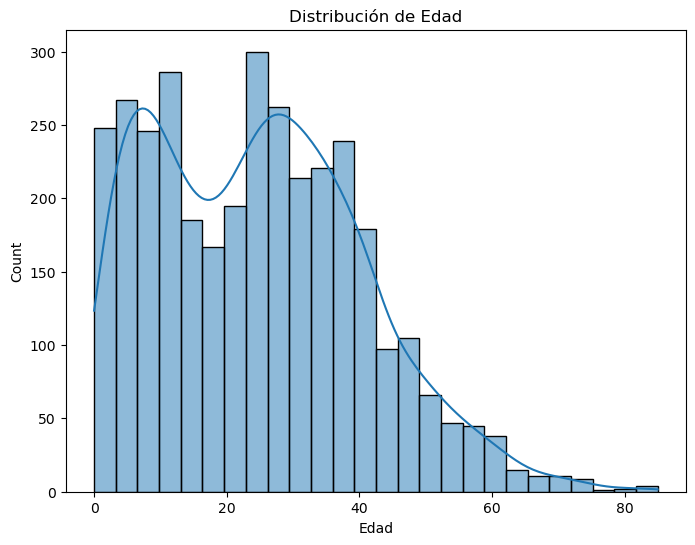

In [8]:
# Visualización de la distribución de variables numéricas
numerical_variables = ['Edad']

for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=var, kde=True)
    plt.title(f'Distribución de {var}')
    plt.show()

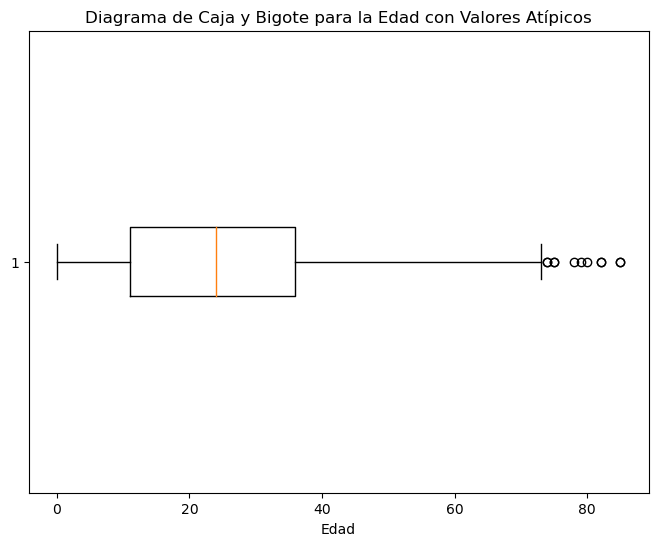

In [9]:
# Crear un gráfico de caja y bigote con marcadores para valores atípicos en la variable "Edad"
plt.figure(figsize=(8, 6))
plt.boxplot(data['Edad'], vert=False, showfliers=True)  # 'showfliers=True' para mostrar los valores atípicos
plt.title('Diagrama de Caja y Bigote para la Edad con Valores Atípicos')
plt.xlabel('Edad')
plt.show()

In [10]:
#Calculo de la correlación entre variables numéricas usando el metodo corr":
data.corr()

,Edad
Edad,1.0


<AxesSubplot:xlabel='Ubicación', ylabel='Edad'>

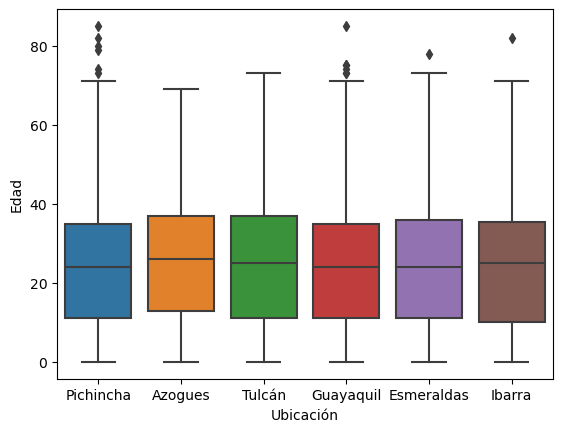

In [11]:
#Distribución de la Variable Edad en función de la variable Ubicación
sns.boxplot(x="Ubicación", y="Edad", data=data)

<AxesSubplot:xlabel='Estatus Legal', ylabel='Edad'>

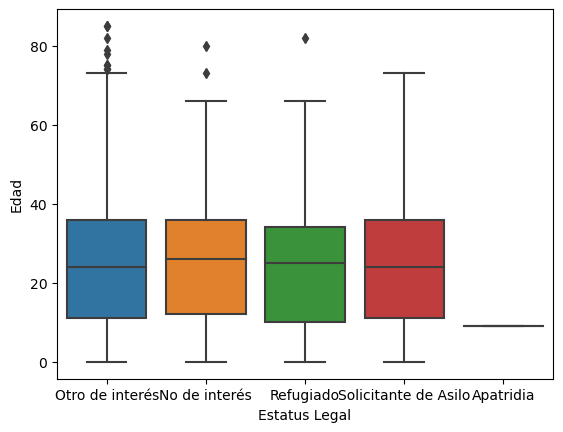

In [12]:
#Distribución de la Variable Edad en función de la variable Estatus Legal
sns.boxplot(x="Estatus Legal", y="Edad", data=data)

<AxesSubplot:xlabel='Genero', ylabel='Edad'>

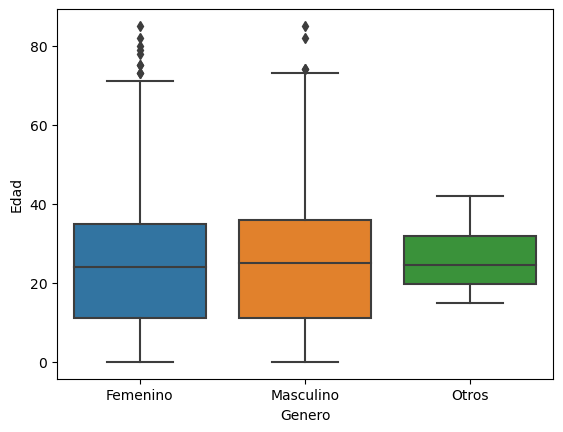

In [13]:
#Distribución de la Variable Edad en función de la variable Genero
sns.boxplot(x="Genero", y="Edad", data=data)

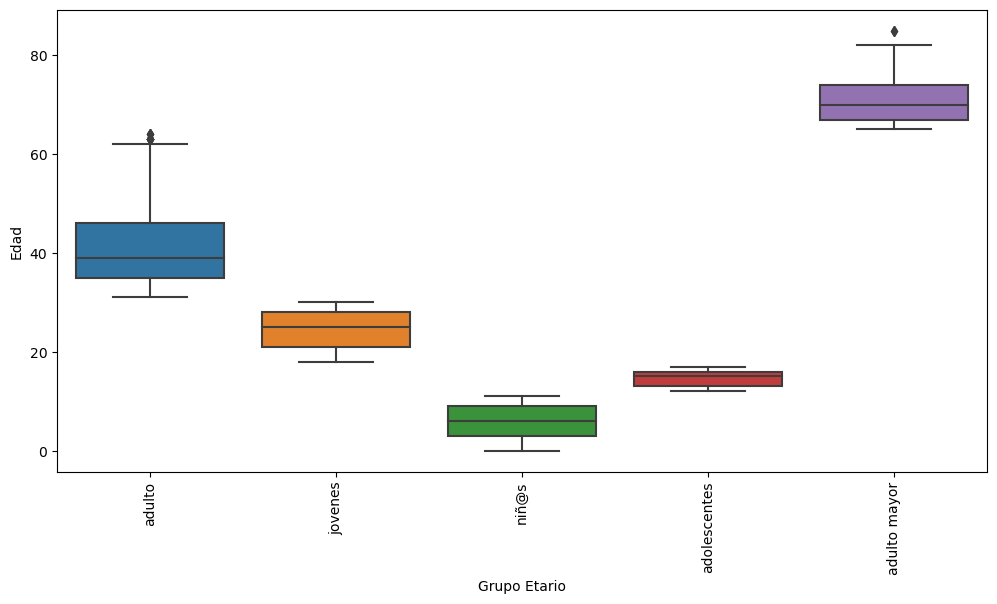

In [14]:
#Distribución de la Variable Edad en función de la variable Grupo Etario
plt.figure(figsize=(12, 6))  # Aumenta el tamaño de la figura
sns.boxplot(x="Grupo Etario", y="Edad", data=data)
plt.xticks(rotation=90)
plt.show()

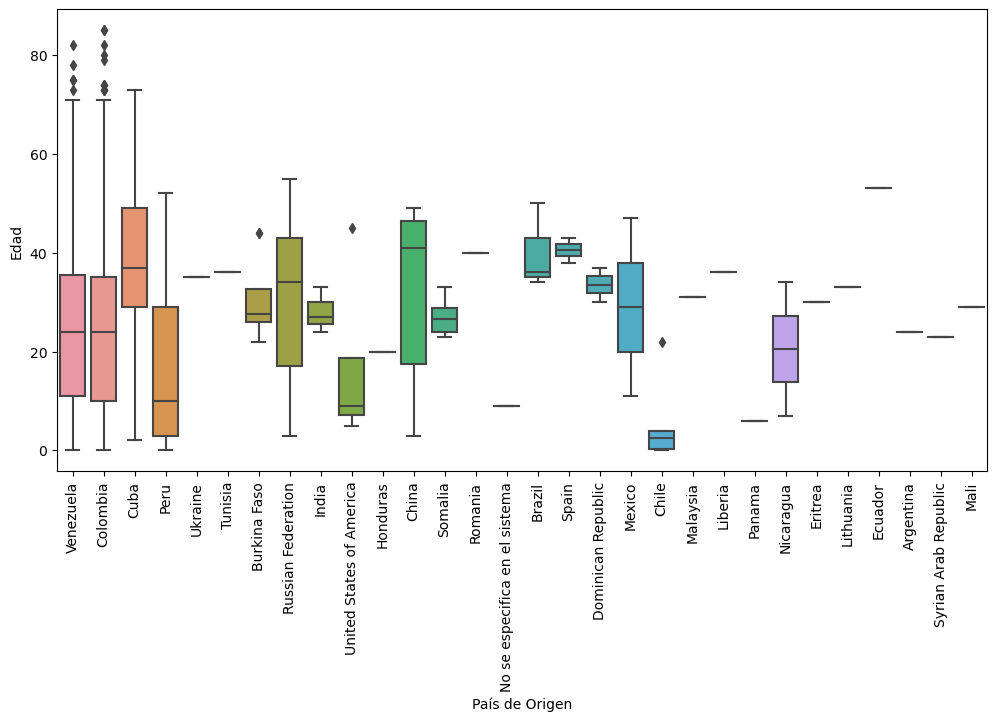

In [15]:
#Distribución de la Variable Edad en función de la variable País de Origen
plt.figure(figsize=(12, 6))  # Aumenta el tamaño de la figura
sns.boxplot(x="País de Origen", y="Edad", data=data)
plt.xticks(rotation=90)
plt.show()

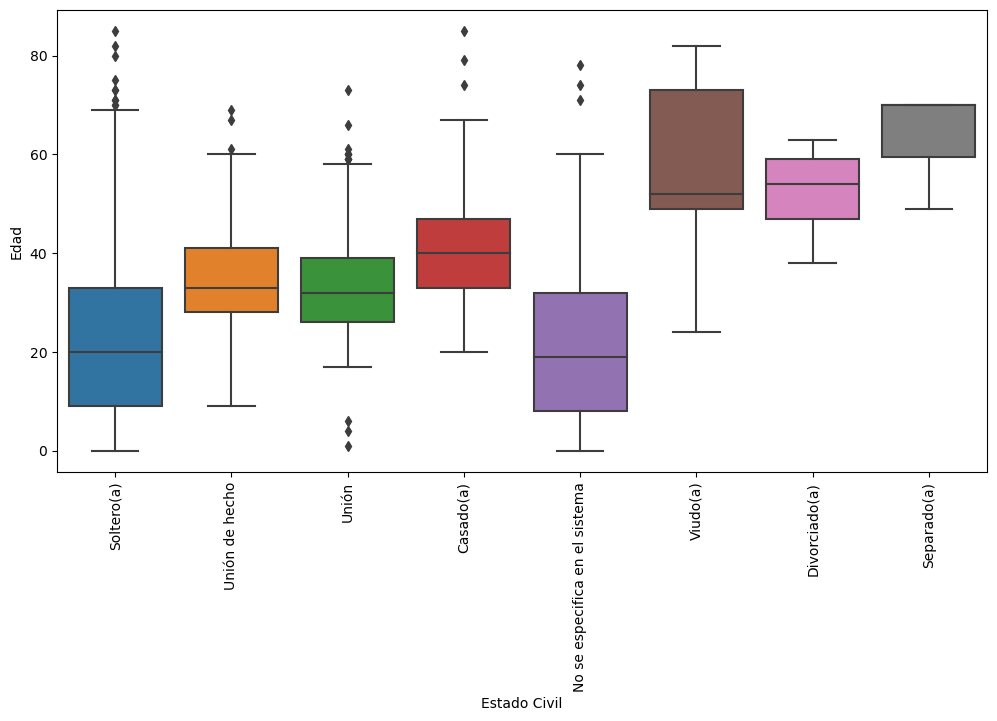

Valores atípicos en Edad con respecto a la categoría Estado Civil con valor 'Unión': 


,Ubicación,Estatus Legal,Genero,Grupo Etario,Edad,País de Origen,Estado Civil
170,Pichincha,Solicitante de Asilo,Masculino,niñ@s,6,Colombia,Unión
466,Pichincha,Refugiado,Femenino,niñ@s,1,Colombia,Unión
1030,Tulcán,Refugiado,Femenino,niñ@s,4,Colombia,Unión


In [16]:
plt.figure(figsize=(12, 6))  # Aumenta el tamaño de la figura
sns.boxplot(x="Estado Civil", y="Edad", data=data)
plt.xticks(rotation=90)  # Puedes rotar las etiquetas en el eje X para mayor legibilidad
plt.show()

# Identificar valores atípicos
union_outliers = data[(data["Estado Civil"] == "Unión") & (data["Edad"] < data["Edad"].quantile(0.25))]

# Mostrar valores atípicos en una tabla
print("Valores atípicos en Edad con respecto a la categoría Estado Civil con valor 'Unión': ")
union_outliers

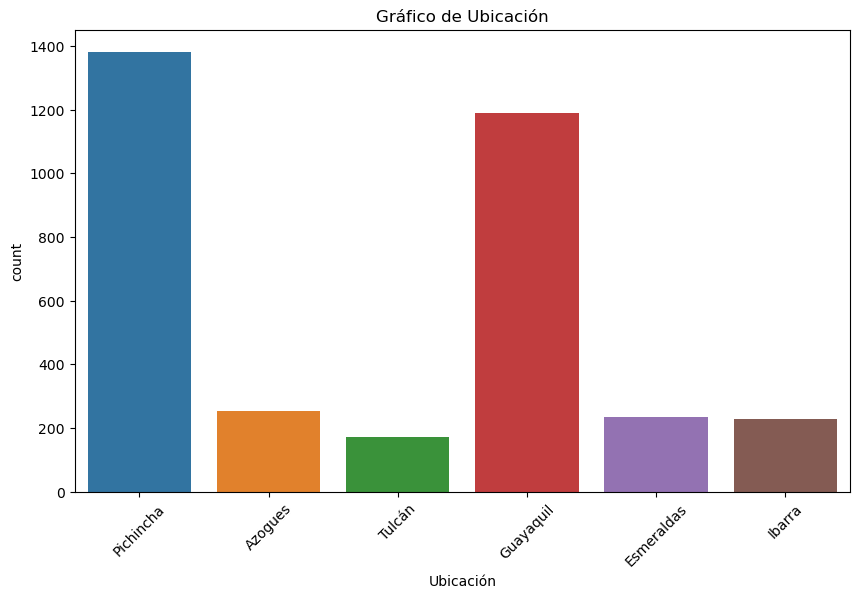

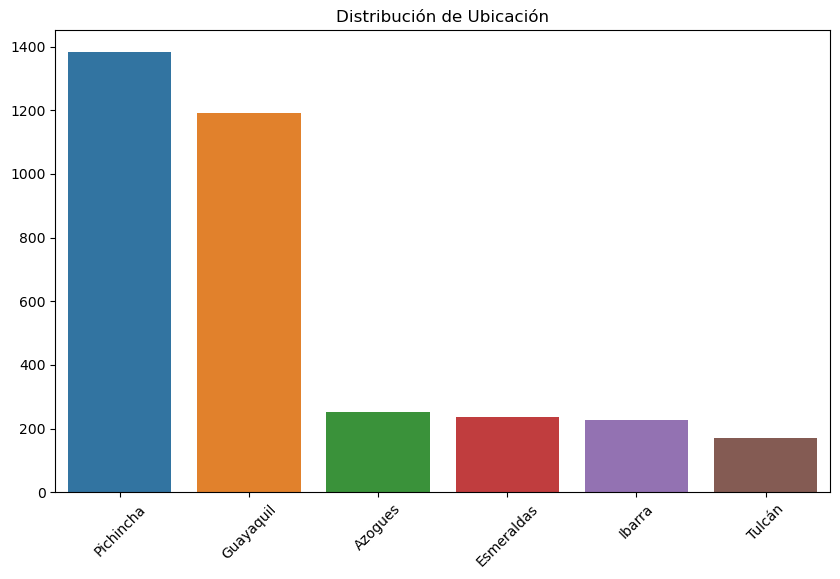

Resumen estadístico para Ubicación:

Pichincha     1382
Guayaquil     1191
Azogues        253
Esmeraldas     236
Ibarra         227
Tulcán         171
Name: Ubicación, dtype: int64


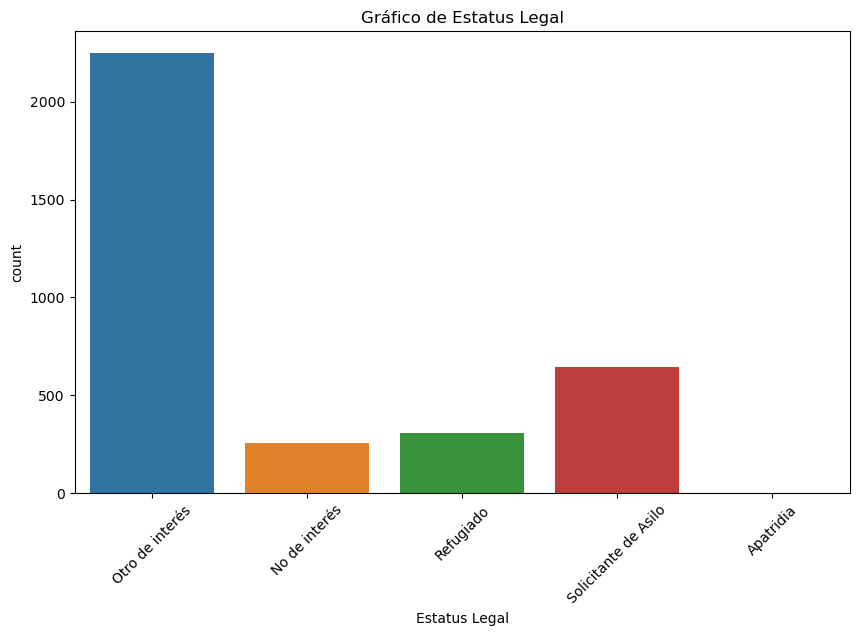

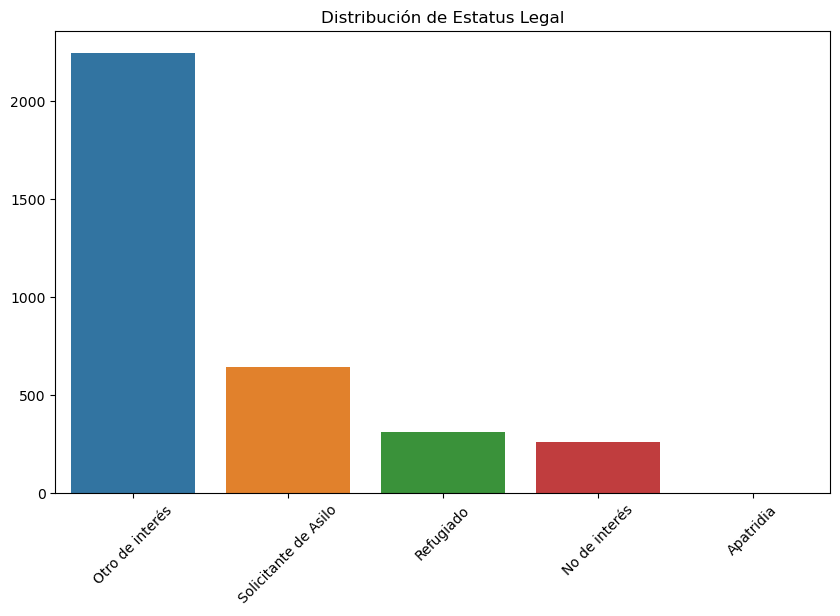

Resumen estadístico para Estatus Legal:

Otro de interés         2248
Solicitante de Asilo     644
Refugiado                308
No de interés            259
Apatridia                  1
Name: Estatus Legal, dtype: int64


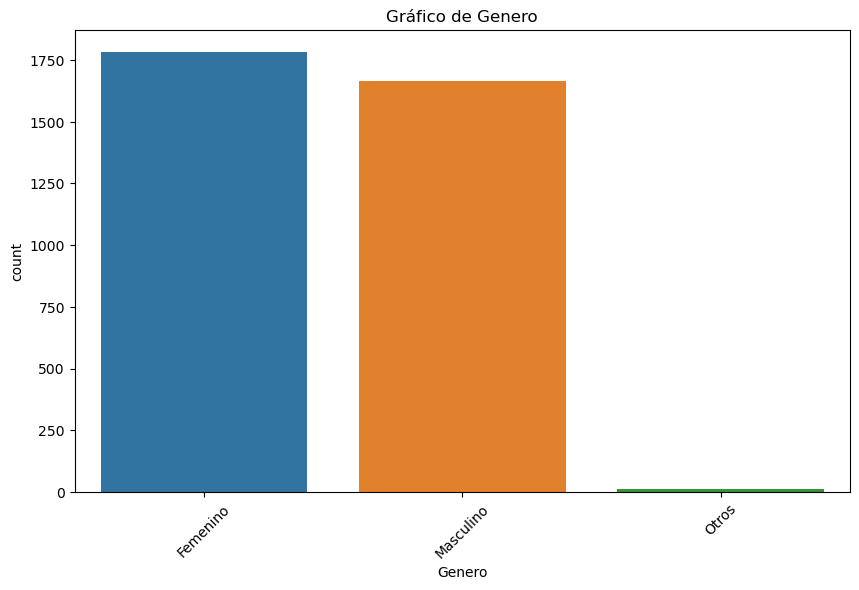

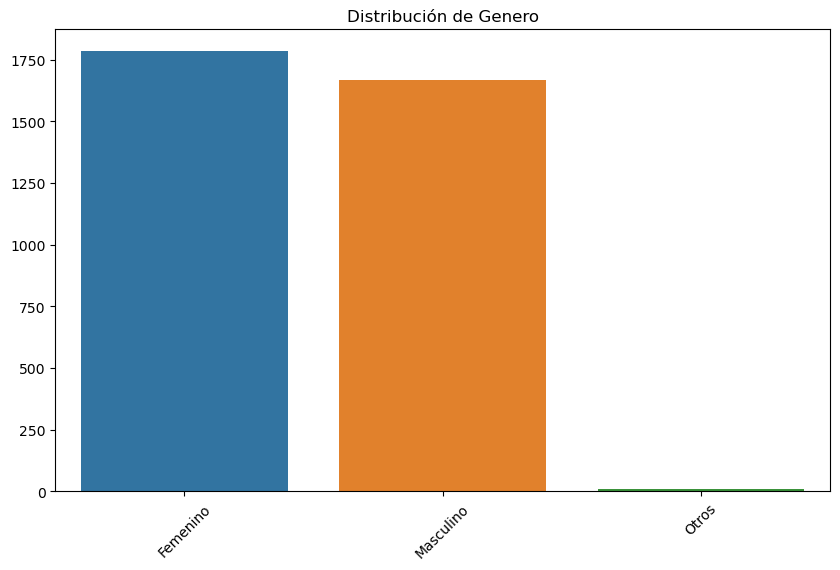

Resumen estadístico para Genero:

Femenino     1783
Masculino    1667
Otros          10
Name: Genero, dtype: int64


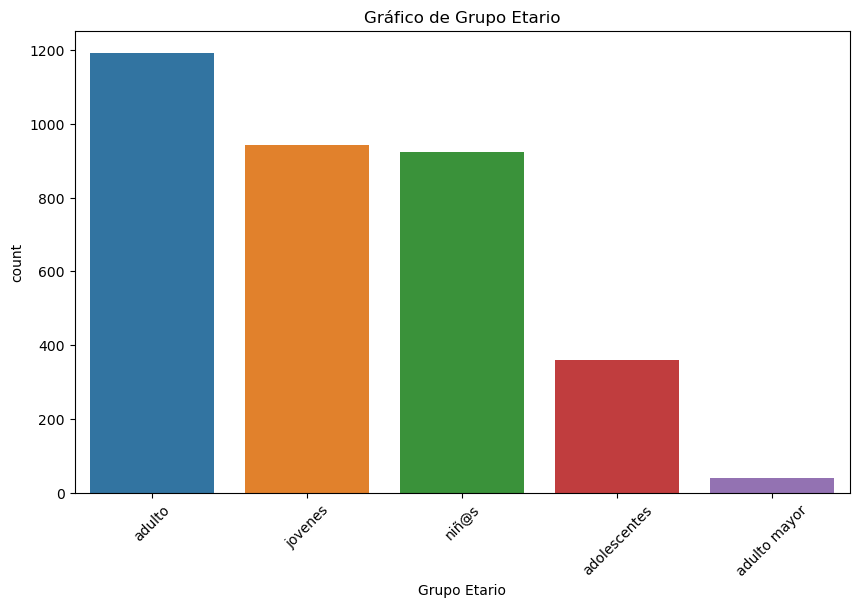

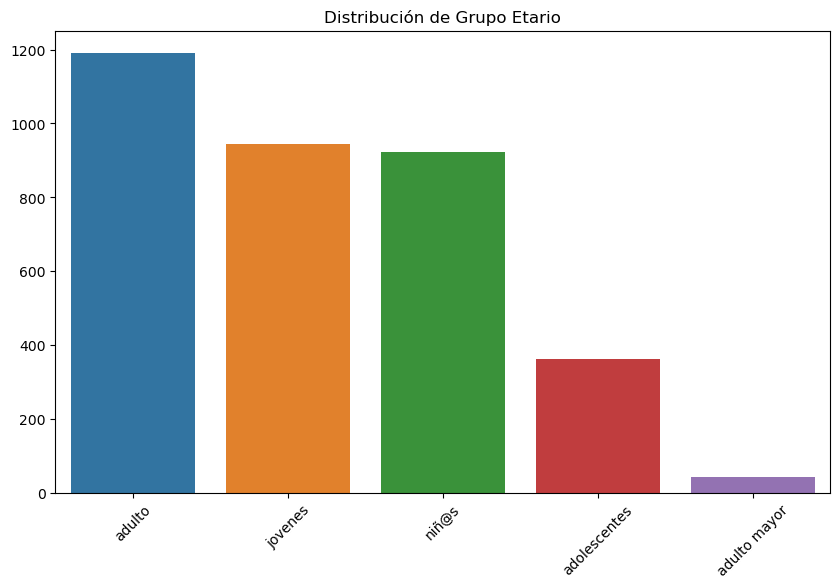

Resumen estadístico para Grupo Etario:

adulto          1192
jovenes          943
niñ@s            923
adolescentes     361
adulto mayor      41
Name: Grupo Etario, dtype: int64


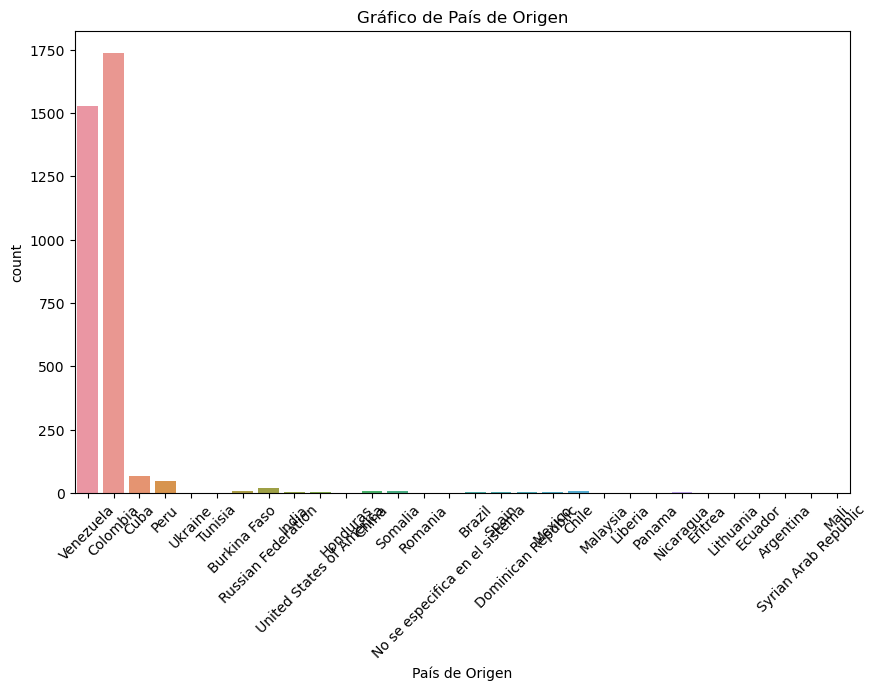

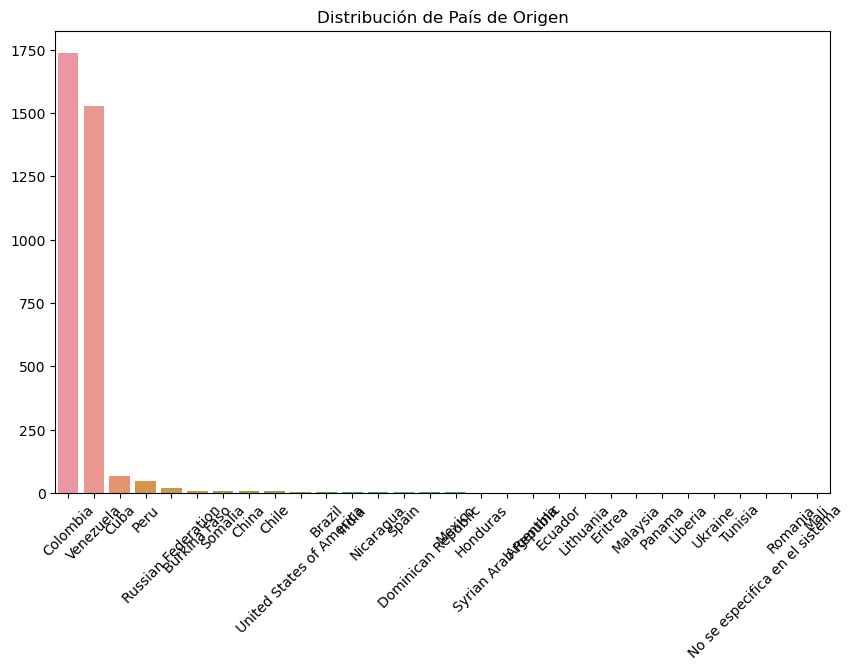

Resumen estadístico para País de Origen:

Colombia                          1737
Venezuela                         1527
Cuba                                66
Peru                                49
Russian Federation                  21
Burkina Faso                         8
Somalia                              8
China                                6
Chile                                6
United States of America             4
Brazil                               3
India                                3
Nicaragua                            2
Spain                                2
Dominican Republic                   2
Mexico                               2
Honduras                             1
Syrian Arab Republic                 1
Argentina                            1
Ecuador                              1
Lithuania                            1
Eritrea                              1
Malaysia                             1
Panama                               1
Liberia               

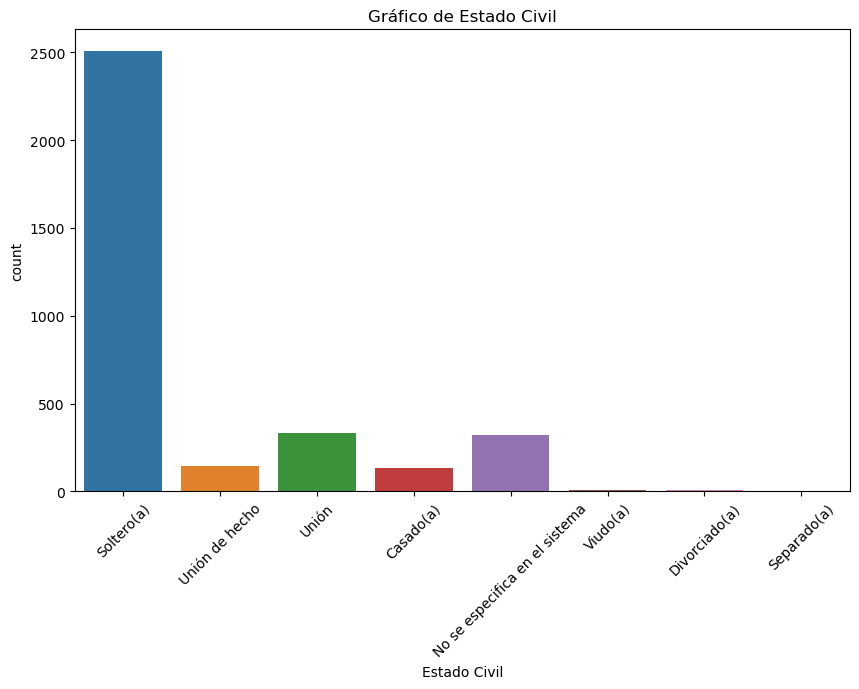

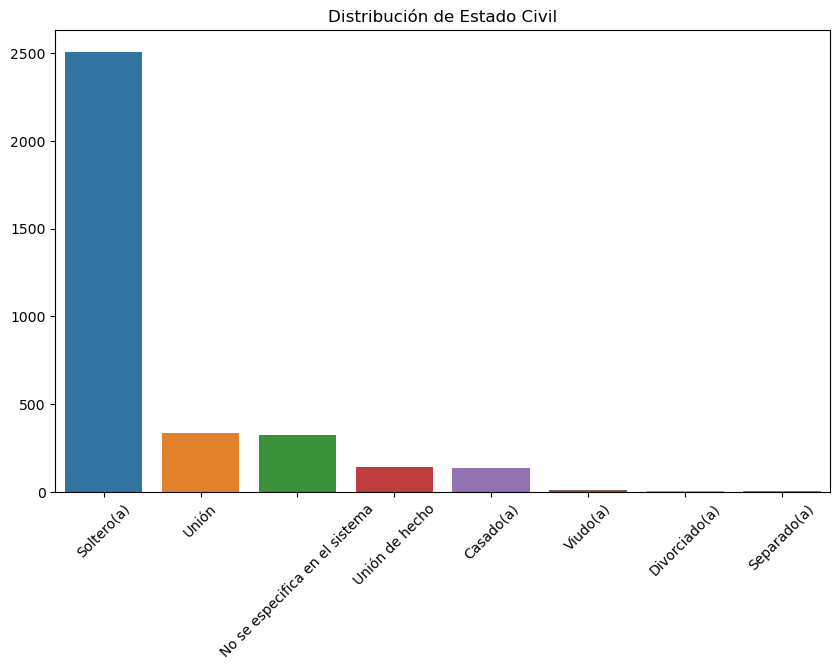

Resumen estadístico para Estado Civil:

Soltero(a)                        2505
Unión                              334
No se especifica en el sistema     323
Unión de hecho                     145
Casado(a)                          134
Viudo(a)                             9
Divorciado(a)                        7
Separado(a)                          3
Name: Estado Civil, dtype: int64


In [17]:
import matplotlib.pyplot as plt

categorical_variables = ['Ubicación', 'Estatus Legal', 'Genero', 'Grupo Etario', 'País de Origen', 'Estado Civil']

for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Gráfico de {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Visualización de la distribución de la variable categórica
    category_distribution = data[var].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_distribution.index, y=category_distribution.values)
    plt.title(f'Distribución de {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Resumen estadístico para variables categóricas
    print(f"Resumen estadístico para {var}:\n")
    print(data[var].value_counts())


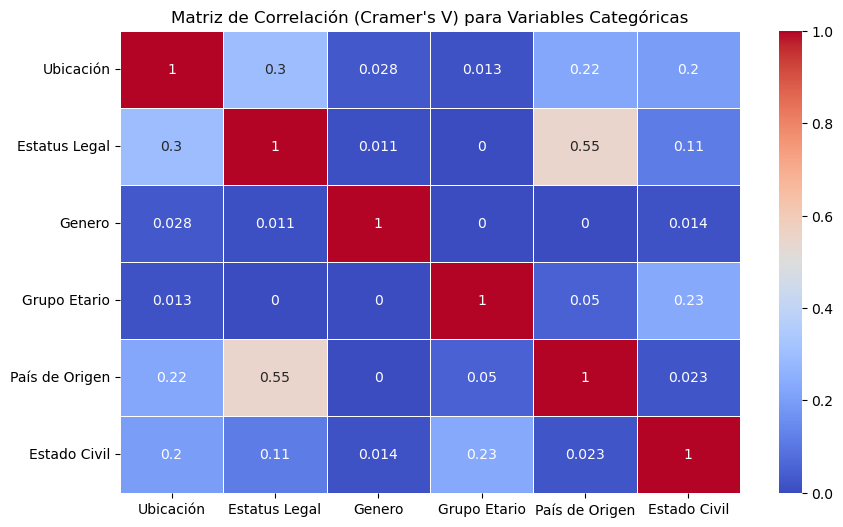

In [18]:
#Obtenemos la matriz de correlación entre las variables categóricas
import numpy as np
# Función para calcular el coeficiente de Cramer's V
def cramers_v(var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calcular la matriz de correlación
correlation_matrix = pd.DataFrame(index=categorical_variables, columns=categorical_variables)

for var1 in categorical_variables:
    for var2 in categorical_variables:
        correlation_matrix.loc[var1, var2] = cramers_v(var1, var2)

# Convertir la matriz de correlación a números
correlation_matrix = correlation_matrix.apply(pd.to_numeric)

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación (Cramer\'s V) para Variables Categóricas')
plt.show()

In [19]:
# Mostrar la tabla de valores de correlación
correlation_matrix

,Ubicación,Estatus Legal,Genero,Grupo Etario,País de Origen,Estado Civil
Ubicación,1.000000,0.295555,0.027794,0.013015,0.224055,0.197698
Estatus Legal,0.295555,1.000000,0.011019,0.000000,0.547183,0.109521
Genero,0.027794,0.011019,1.000000,0.000000,0.000000,0.014199
Grupo Etario,0.013015,0.000000,0.000000,1.000000,0.050186,0.232775
País de Origen,0.224055,0.547183,0.000000,0.050186,1.000000,0.023417
Estado Civil,0.197698,0.109521,0.014199,0.232775,0.023417,1.000000


In [20]:
# Visualización de correlación para variables categóricas relacionado con la Edad
correlation_with_categorical = {}
for cat_var in categorical_variables:
    contingency_table = pd.crosstab(data[cat_var], data['Edad'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    correlation_with_categorical[cat_var] = chi2

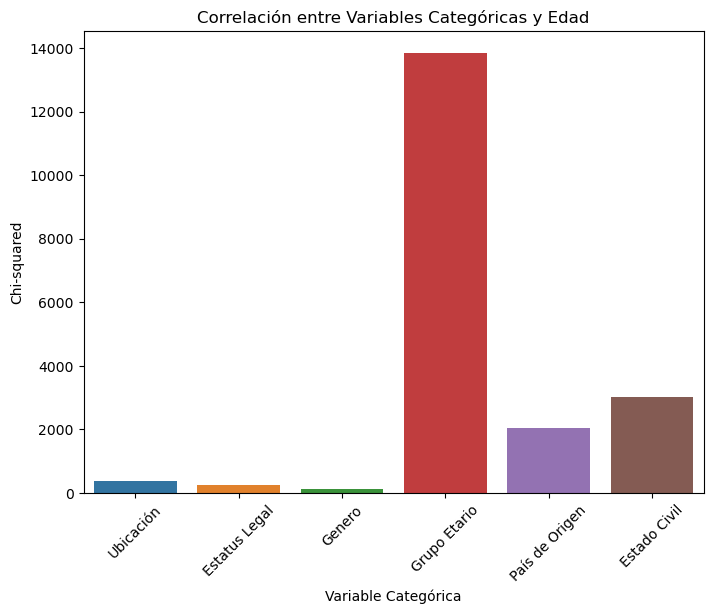

In [21]:
# Gráfico de matriz de correlación entre variables categóricas y numéricas
correlation_df = pd.DataFrame(list(correlation_with_categorical.items()), columns=['Variable Categórica', 'Chi-squared'])
plt.figure(figsize=(8, 6))
sns.barplot(x='Variable Categórica', y='Chi-squared', data=correlation_df)
plt.xticks(rotation=45)
plt.title('Correlación entre Variables Categóricas y Edad')
plt.show()

In [22]:
# Guardar los datos transformados en un nuevo archivo CSV con codificación ISO-8859-1
data.to_csv('datos_transformados.csv', index=False, sep=';', encoding='ISO-8859-1')

### 3. Creación de un modelo de segmentación con técnicas de Machine Learning

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Leer el archivo CSV "datos_transformados.csv"
data = pd.read_csv("datos_transformados.csv", encoding="ISO-8859-1", delimiter=";")

# Lista de columnas categóricas
categorical_columns = ['Ubicación', 'Estatus Legal', 'Genero', 'Grupo Etario', 'País de Origen', 'Estado Civil']

# Realizar la transformación de las columnas categóricas usando one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

#Normalizar Edad MinMaxScaler
scaler = MinMaxScaler()
# Normalizar la columna 'Edad' en el rango [0, 1]
data_encoded['Edad'] = scaler.fit_transform(data_encoded[['Edad']])

data_encoded

,Edad,Ubicación_Azogues,Ubicación_Esmeraldas,Ubicación_Guayaquil,Ubicación_Ibarra,Ubicación_Pichincha,Ubicación_Tulcán,Estatus Legal_Apatridia,Estatus Legal_No de interés,Estatus Legal_Otro de interés,...,País de Origen_United States of America,País de Origen_Venezuela,Estado Civil_Casado(a),Estado Civil_Divorciado(a),Estado Civil_No se especifica en el sistema,Estado Civil_Separado(a),Estado Civil_Soltero(a),Estado Civil_Unión,Estado Civil_Unión de hecho,Estado Civil_Viudo(a)
0,0.411765,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0.258824,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.000000,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.705882,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0.282353,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,0.152941,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3456,0.082353,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3457,0.117647,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3458,0.317647,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


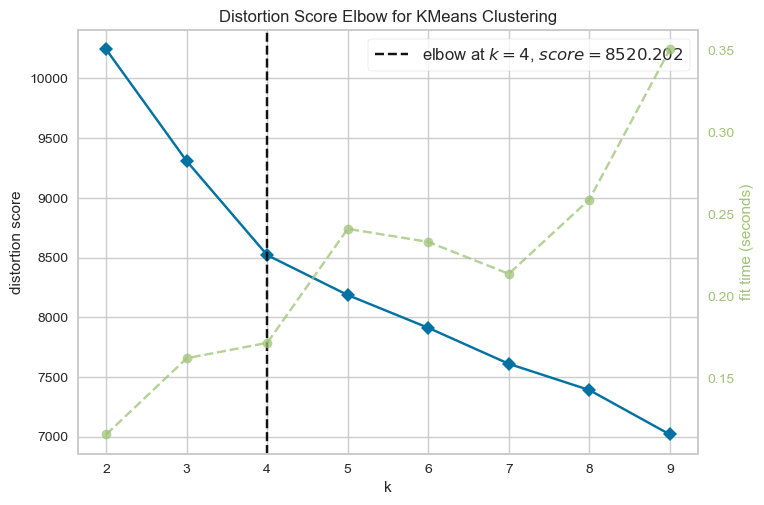

Número óptimo de clústeres: 4
Puntaje Silhouette para el número óptimo de clústeres: 0.15742030377068508


In [24]:
# Combinar las variables categóricas codificadas y numéricas
X = data_encoded.values

# Usar el método del codo para encontrar el número óptimo de clústeres
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X)
visualizer.show()

# Calcular el puntaje Silhouette para el número óptimo de clústeres
optimal_n_clusters = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, kmeans_clusters)
print(f"Número óptimo de clústeres: {optimal_n_clusters}")
print(f"Puntaje Silhouette para el número óptimo de clústeres: {silhouette_avg}")


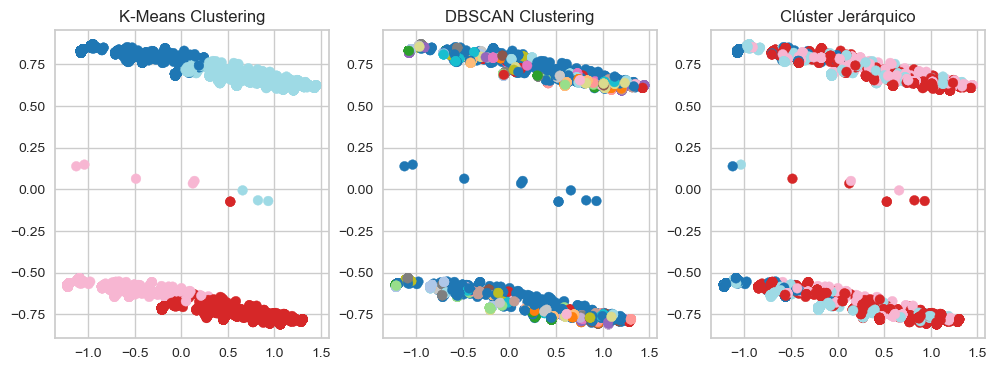

Puntaje Silhouette para K-Means: 0.15374434479612595
Puntaje Silhouette para DBSCAN: 0.7158377402450273
Puntaje Silhouette para Clúster Jerárquico: 0.07123235484724331
Mejor modelo de clústeres: DBSCAN
Puntaje Silhouette del mejor modelo: 0.7158377402450273


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

# Leer el archivo CSV "datos_transformados.csv"
data = pd.read_csv("datos_transformados.csv", encoding="ISO-8859-1", delimiter=";")

# Lista de columnas categóricas
categorical_columns = ['Ubicación', 'Estatus Legal', 'Genero', 'Grupo Etario', 'País de Origen', 'Estado Civil']

# Realizar la transformación de las columnas categóricas usando one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Lista de columnas numéricas a normalizar
#numerical_columns = ['Edad']  # Agrega aquí otras columnas numéricas si es necesario
#scaler = StandardScaler()
#data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

#Normalizar Edad MinMaxScaler
scaler = MinMaxScaler()
# Normalizar la columna 'Edad' en el rango [0, 1]
data_encoded['Edad'] = scaler.fit_transform(data_encoded[['Edad']])

# Combinar las variables categóricas codificadas y numéricas
X = data_encoded.values

# K-Means
model_kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = model_kmeans.fit_predict(X)

# DBSCAN
model_dbscan = DBSCAN(eps=1.0, min_samples=3)
dbscan_clusters = model_dbscan.fit_predict(X)

# Clúster Jerárquico
model_hierarchy = AgglomerativeClustering(n_clusters=4)
hierarchy_clusters = model_hierarchy.fit_predict(X)

# Visualización de K-Means
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='tab20')
plt.title('K-Means Clustering')

# Visualización de DBSCAN
plt.subplot(132)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='tab20')
plt.title('DBSCAN Clustering')

# Visualización de Clúster Jerárquico
plt.subplot(133)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchy_clusters, cmap='tab20')
plt.title('Clúster Jerárquico')

plt.show()

# Evaluación de los modelos
silhouette_kmeans = silhouette_score(X, kmeans_clusters)
silhouette_dbscan = silhouette_score(X, dbscan_clusters)
silhouette_hierarchy = silhouette_score(X, hierarchy_clusters)

print(f"Puntaje Silhouette para K-Means: {silhouette_kmeans}")
print(f"Puntaje Silhouette para DBSCAN: {silhouette_dbscan}")
print(f"Puntaje Silhouette para Clúster Jerárquico: {silhouette_hierarchy}")

# Comparación de modelos
best_model = None
best_silhouette = -1

if silhouette_kmeans > best_silhouette:
    best_model = "K-Means"
    best_silhouette = silhouette_kmeans

if silhouette_dbscan > best_silhouette:
    best_model = "DBSCAN"
    best_silhouette = silhouette_dbscan

if silhouette_hierarchy > best_silhouette:
    best_model = "Clúster Jerárquico"
    best_silhouette = silhouette_hierarchy

print(f"Mejor modelo de clústeres: {best_model}")
print(f"Puntaje Silhouette del mejor modelo: {best_silhouette}")

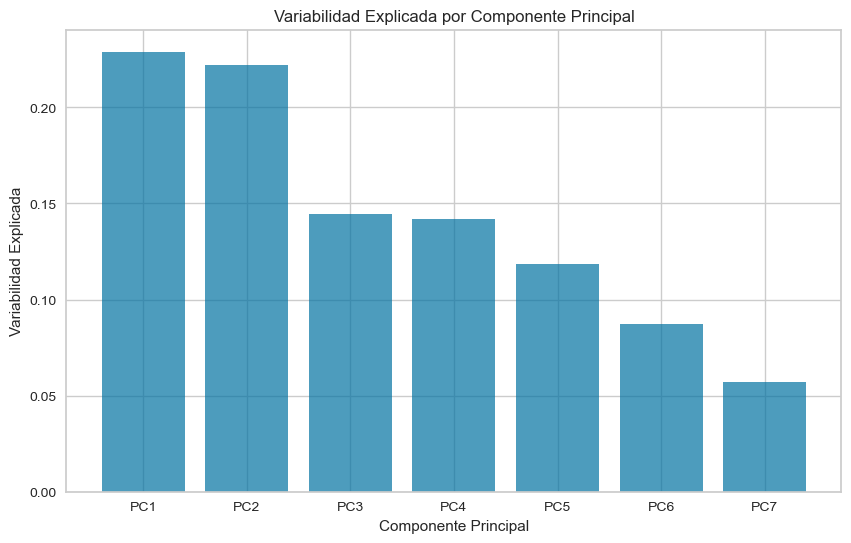

Variables y sus cargas en el Componente Principal 1:
Edad: 0.6925
Grupo Etario: -0.6918

Variables y sus cargas en el Componente Principal 2:
País de Origen: 0.6288
Estatus Legal: -0.5364

Variables y sus cargas en el Componente Principal 3:
Estado Civil: -0.7293
Genero: 0.6817

Variables y sus cargas en el Componente Principal 4:
Genero: -0.7243
Estado Civil: -0.6664

Variables y sus cargas en el Componente Principal 5:
Ubicación: -0.7208
Estatus Legal: 0.6681

Variables y sus cargas en el Componente Principal 6:
País de Origen: 0.7629
Estatus Legal: 0.4894

Variables y sus cargas en el Componente Principal 7:
Grupo Etario: 0.7036
Edad: 0.7023



,Edad,Ubicación,Estatus Legal,Genero,Grupo Etario,País de Origen,Estado Civil
PC1,0.692534,-0.085075,-0.124390,-0.015994,-0.691819,0.127627,-0.050288
PC2,-0.134609,-0.526152,-0.536412,-0.036539,0.143290,0.628840,-0.000478
PC3,-0.021315,0.014270,-0.047244,0.681674,0.022829,0.000929,-0.729320
PC4,-0.041968,0.143389,-0.091759,-0.724284,0.019402,-0.014294,-0.666401
PC5,0.047140,-0.720752,0.668129,-0.094271,0.022282,-0.033705,-0.146218
PC6,-0.068332,0.411347,0.489383,0.014787,-0.065937,0.762878,-0.008926
PC7,0.702261,0.080453,0.015700,-0.006059,0.703643,0.070344,-0.003515


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Leer los datos desde un archivo CSV (asegúrate de que tus datos estén en "datos.csv")
df = pd.read_csv('datos_transformados.csv', delimiter=';', encoding='ISO-8859-1')

# Seleccionar las características para el análisis de PCA
numeric_features = ["Edad"]
categorical_features = ["Ubicación", "Estatus Legal", "Genero", "Grupo Etario", "País de Origen", "Estado Civil"]

# Codificar las variables categóricas
encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Combinar características numéricas y categóricas
X = pd.concat([df[numeric_features], df[categorical_features]], axis=1)

# Estandarizar las características (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el análisis de componentes principales (PCA)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variabilidad explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Visualizar la importancia de los componentes principales
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Componente Principal')
plt.ylabel('Variabilidad Explicada')
plt.title('Variabilidad Explicada por Componente Principal')
plt.xticks(range(1, len(explained_variance_ratio) + 1, 1), [f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)])
plt.show()

# Obtener las cargas de las variables en los primeros componentes principales
loadings = pca.components_

# Imprimir los valores de las variables y sus cargas en el primer componente principal
n_top_features = 2  # Número de variables más importantes a mostrar
top_feature_indices = X.columns[np.argsort(np.abs(loadings[0]))[::-1]][:n_top_features]

# Imprimir las variables y sus cargas en todos los componentes principales
n_top_features = 2  # Número de variables más importantes a mostrar
for i in range(pca.n_components_):
    component_loadings = loadings[i]
    top_feature_indices = X.columns[np.argsort(np.abs(component_loadings))[::-1]][:n_top_features]

    print(f"Variables y sus cargas en el Componente Principal {i + 1}:")
    for feature in top_feature_indices:
        feature_index = X.columns.get_loc(feature)
        print(f"{feature}: {component_loadings[feature_index]:.4f}")
    print()

# Crear un DataFrame para mostrar los valores de las variables en cada componente principal
components_df = pd.DataFrame(loadings, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
components_df

<function matplotlib.pyplot.show(close=None, block=None)>

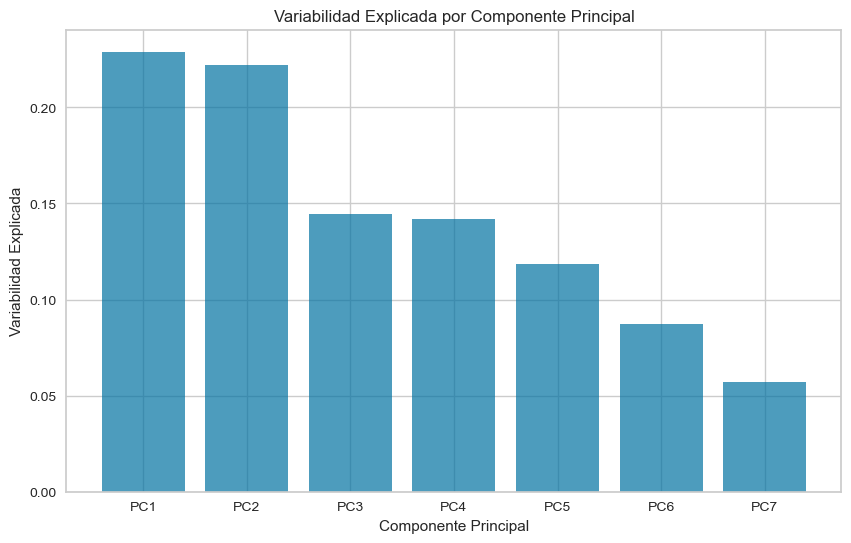

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Leer los datos desde un archivo CSV (asegúrate de que tus datos estén en "datos_transformados.csv")
df = pd.read_csv('datos_transformados.csv', delimiter=';', encoding='ISO-8859-1')

# Seleccionar las características para el análisis de PCA
numeric_features = ["Edad"]
categorical_features = ["Ubicación", "Estatus Legal", "Genero", "Grupo Etario", "País de Origen", "Estado Civil"]

# Codificar las variables categóricas
encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Combinar características numéricas y categóricas
X = pd.concat([df[numeric_features], df[categorical_features]], axis=1)

# Estandarizar las características (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el análisis de componentes principales (PCA) con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar la importancia de los componentes principales
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Componente Principal')
plt.ylabel('Variabilidad Explicada')
plt.title('Variabilidad Explicada por Componente Principal')
plt.xticks(range(1, len(explained_variance_ratio) + 1, 1), [f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)])
plt.show


In [28]:
# Variabilidad explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Variabilidad explicada por cada componente: "+ str(explained_variance_ratio))

Variabilidad explicada por cada componente: [0.22895157 0.22199492]


Variables y sus cargas en el Componente Principal 1:
Edad: 0.6925
Grupo Etario: -0.6918

Variables y sus cargas en el Componente Principal 2:
País de Origen: 0.6288
Estatus Legal: -0.5364

Explicabilidad acumulativa del Componente Principal 1: 22.90%
Explicabilidad acumulativa del Componente Principal 2: 45.09%


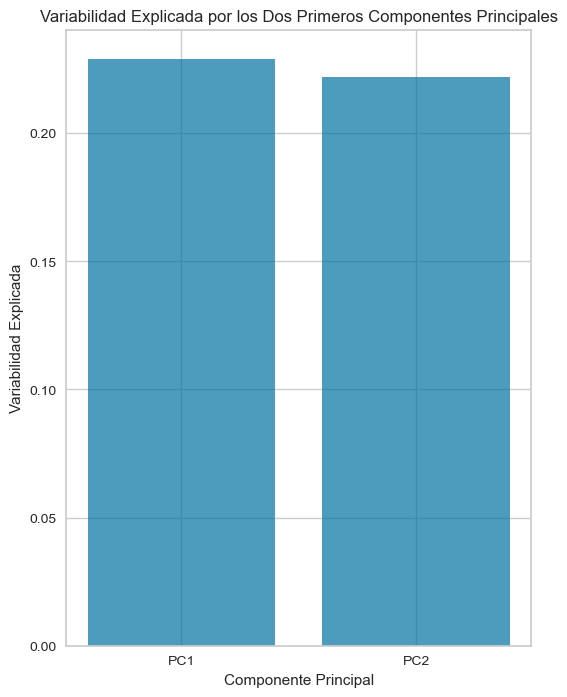

In [29]:
# Obtener las cargas de las variables en los dos primeros componentes principales
loadings = pca.components_

# Imprimir los valores de las variables y sus cargas en los dos primeros componentes principales
n_top_features = 2  # Número de variables más importantes a mostrar

for i in range(2):  # Solo imprimimos los dos primeros componentes
    component_loadings = loadings[i]
    top_feature_indices = X.columns[np.argsort(np.abs(component_loadings))[::-1]][:n_top_features]

    print(f"Variables y sus cargas en el Componente Principal {i + 1}:")
    for feature in top_feature_indices:
        feature_index = X.columns.get_loc(feature)
        print(f"{feature}: {component_loadings[feature_index]:.4f}")
    print()

# Explicabilidad acumulativa
explained_variance_cumulative = explained_variance_ratio.cumsum() * 100

# Mostrar la explicabilidad acumulativa
print(f"Explicabilidad acumulativa del Componente Principal 1: {explained_variance_cumulative[0]:.2f}%")
print(f"Explicabilidad acumulativa del Componente Principal 2: {explained_variance_cumulative[1]:.2f}%")

# Graficar los componentes principales en forma vertical
plt.figure(figsize=(6, 8))
plt.bar([f'PC{i+1}' for i in range(2)], explained_variance_ratio[:2], alpha=0.7)
plt.xlabel('Componente Principal')
plt.ylabel('Variabilidad Explicada')
plt.title('Variabilidad Explicada por los Dos Primeros Componentes Principales')
plt.show()


#### En base a los resultados del análisis de componentes principales (PCA) realziado, se da algunas conclusiones con respecto a las variables más relevantes:

#### -Componente Principal 1: Este componente explica aproximadamente el 22.90% de la variabilidad en tus datos. Las dos variables que más influyen en este componente son "Edad" (con una carga positiva de 0.6925) y "Grupo Etario" (con una carga negativa de -0.6918). 
#### Interpretación: Esto sugiere que "Edad" y "Grupo Etario" son las variables más relevantes en la explicación de la variabilidad capturada por este componente. Además, dado que las cargas tienen valores opuestos, estos dos factores están inversamente relacionados en el contexto de este componente.

#### -Componente Principal 2: Este componente explica aproximadamente el 22.20% de la variabilidad en tus datos. Las dos variables más influyentes en este componente son "País de Origen" (con una carga positiva de 0.6288) y "Estatus Legal" (con una carga negativa de -0.5364). 
#### Interpretación: Esto sugiere que "País de Origen" y "Estatus Legal" son las variables más relevantes en la explicación de la variabilidad capturada por este segundo componente. Nuevamente, las cargas con valores opuestos indican una relación inversa entre estas dos variables en el contexto de este componente.

#### -Explicabilidad Acumulativa: Los dos componentes principales juntos explican el 45.09% de la variabilidad en tus datos. 
#### Interpretación: Esto significa que estas dos combinaciones lineales de variables capturan un poco menos del 50% de la variabilidad total en tus datos. La "Edad" y el "Grupo Etario" explican una parte significativa de la variabilidad en el primer componente, mientras que el "País de Origen" y el "Estatus Legal" son influyentes en el segundo componente.

#### Las variables más relevantes para explicar la variabilidad en los datos se distribuyen entre "Edad," "Grupo Etario," "País de Origen," y "Estatus Legal." Estas variables están asociadas con los dos primeros componentes principales y proporcionan información importante sobre la estructura y relaciones subyacentes en los datos.

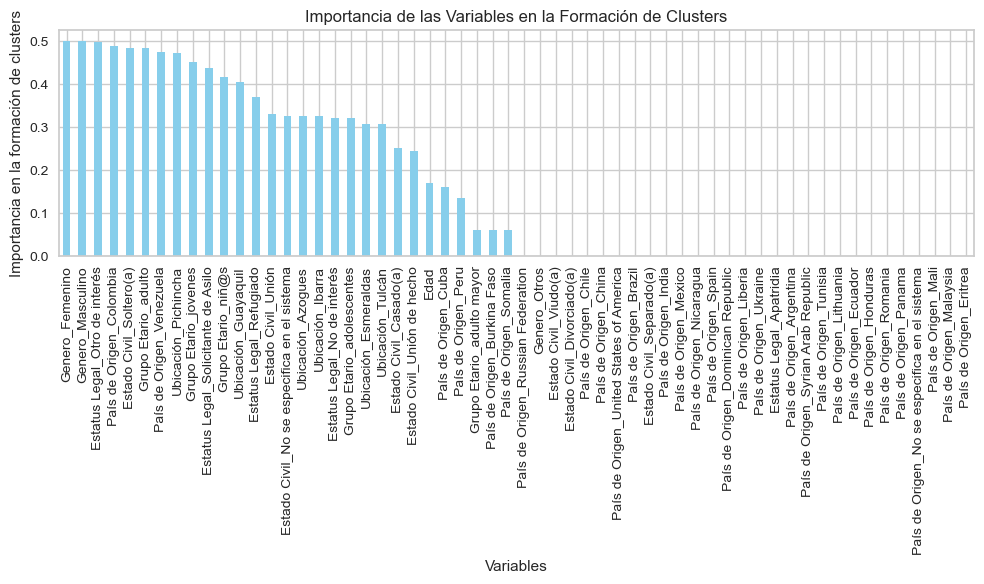

Importancia de las variables en la formación de clusters (ordenadas):
Genero_Femenino                                  0.499988
Genero_Masculino                                 0.499986
Estatus Legal_Otro de interés                    0.498600
País de Origen_Colombia                          0.489500
Estado Civil_Soltero(a)                          0.485261
Grupo Etario_adulto                              0.483129
País de Origen_Venezuela                         0.475277
Ubicación_Pichincha                              0.472727
Grupo Etario_jovenes                             0.450980
Estatus Legal_Solicitante de Asilo               0.437315
Grupo Etario_niñ@s                               0.416595
Ubicación_Guayaquil                              0.406117
Estatus Legal_Refugiado                          0.369275
Estado Civil_Unión                               0.330737
Estado Civil_No se especifica en el sistema      0.326394
Ubicación_Azogues                                0.326378
Ub

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Leer el archivo CSV "datos_transformados.csv"
data = pd.read_csv("datos_transformados.csv", encoding="ISO-8859-1", delimiter=";")

# Lista de columnas categóricas
categorical_columns = ['Ubicación', 'Estatus Legal', 'Genero', 'Grupo Etario', 'País de Origen', 'Estado Civil']

# Realizar la transformación de las columnas categóricas usando one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Normalizar la columna 'Edad' utilizando MinMaxScaler
scaler = MinMaxScaler()
data_encoded['Edad'] = scaler.fit_transform(data_encoded[['Edad']])

# Combinar las variables categóricas codificadas y numéricas
X = data_encoded.values

# Inicializar y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=3)  # Ajusta los parámetros según tu caso
dbscan.fit(X)

# Calcular el puntaje Silhouette promedio
silhouette_avg = silhouette_score(X, dbscan.labels_)

# Obtener las etiquetas de cluster asignadas a cada punto
cluster_labels = dbscan.labels_

# Crear un DataFrame que contenga las variables y las etiquetas de cluster
cluster_data = pd.concat([data_encoded, pd.Series(cluster_labels, name='Cluster')], axis=1)

# Calcular la importancia de las variables en la formación de los clusters
cluster_centers = cluster_data.groupby('Cluster').mean()
importance = cluster_centers.std()

# Ordenar la importancia de mayor a menor
importance = importance.sort_values(ascending=False)

# Mostrar la importancia de las variables en un gráfico de barras
plt.figure(figsize=(10, 6))
importance.plot(kind='bar', color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Importancia en la formación de clusters')
plt.title('Importancia de las Variables en la Formación de Clusters')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Mostrar la tabla de valores de importancia
print("Importancia de las variables en la formación de clusters (ordenadas):")
print(importance)


Número de clústers generados por DBSCAN: 264
Precisión de los clústers (puntaje Silhouette promedio): 0.72


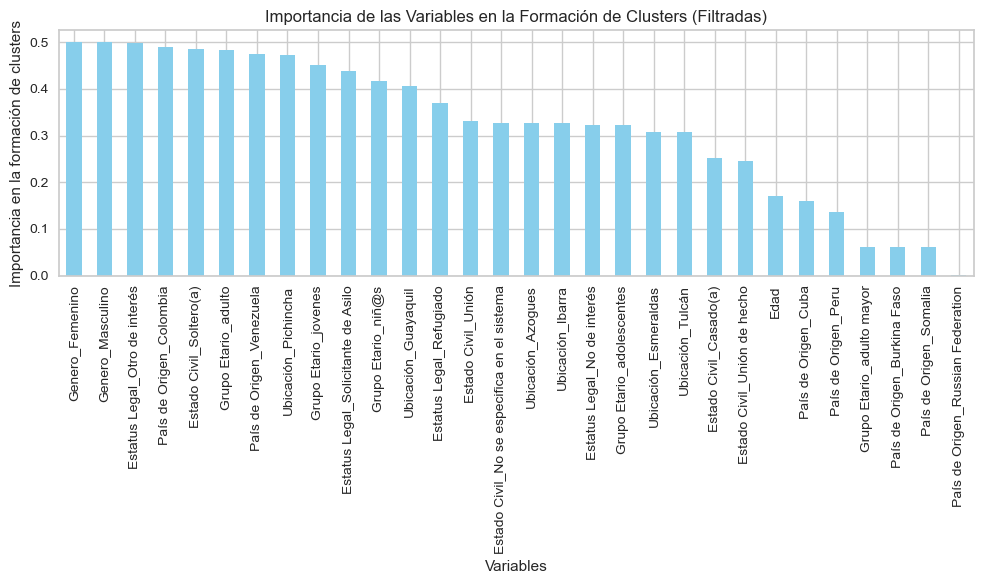

Importancia de las variables en la formación de clusters (filtradas y ordenadas):
Genero_Femenino                                0.499988
Genero_Masculino                               0.499986
Estatus Legal_Otro de interés                  0.498600
País de Origen_Colombia                        0.489500
Estado Civil_Soltero(a)                        0.485261
Grupo Etario_adulto                            0.483129
País de Origen_Venezuela                       0.475277
Ubicación_Pichincha                            0.472727
Grupo Etario_jovenes                           0.450980
Estatus Legal_Solicitante de Asilo             0.437315
Grupo Etario_niñ@s                             0.416595
Ubicación_Guayaquil                            0.406117
Estatus Legal_Refugiado                        0.369275
Estado Civil_Unión                             0.330737
Estado Civil_No se especifica en el sistema    0.326394
Ubicación_Azogues                              0.326378
Ubicación_Ibarra      

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Leer el archivo CSV "datos_transformados.csv"
data = pd.read_csv("datos_transformados.csv", encoding="ISO-8859-1", delimiter=";")

# Lista de columnas categóricas
categorical_columns = ['Ubicación', 'Estatus Legal', 'Genero', 'Grupo Etario', 'País de Origen', 'Estado Civil']

# Realizar la transformación de las columnas categóricas usando one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Normalizar la columna 'Edad' utilizando MinMaxScaler
scaler = MinMaxScaler()
data_encoded['Edad'] = scaler.fit_transform(data_encoded[['Edad']])

# Combinar las variables categóricas codificadas y numéricas
X = data_encoded.values

# Inicializar y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=3)  # Ajusta los parámetros según tu caso
dbscan.fit(X)

# Calcular el número de clústers generados por DBSCAN
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Número de clústers generados por DBSCAN: {n_clusters}")

# Calcular el puntaje Silhouette promedio
silhouette_avg = silhouette_score(X, dbscan.labels_)
print(f"Precisión de los clústers (puntaje Silhouette promedio): {silhouette_avg:.2f}")

# Obtener las etiquetas de cluster asignadas a cada punto
cluster_labels = dbscan.labels_

# Crear un DataFrame que contenga las variables y las etiquetas de cluster
cluster_data = pd.concat([data_encoded, pd.Series(cluster_labels, name='Cluster')], axis=1)

# Calcular la importancia de las variables en la formación de los clusters
cluster_centers = cluster_data.groupby('Cluster').mean()
importance = cluster_centers.std()

# Filtrar las variables con importancia mayor o igual a 0.001784
importance_filtered = importance[importance >= 0.001784]

# Ordenar la importancia de mayor a menor
importance_filtered = importance_filtered.sort_values(ascending=False)

# Mostrar la importancia de las variables en un gráfico de barras
plt.figure(figsize=(10, 6))
importance_filtered.plot(kind='bar', color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Importancia en la formación de clusters')
plt.title('Importancia de las Variables en la Formación de Clusters (Filtradas)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Mostrar la tabla de valores de importancia (filtrada y ordenada)
print("Importancia de las variables en la formación de clusters (filtradas y ordenadas):")
print(importance_filtered)


### Conclusiones:
#### Se pueden identificar varias oportunidades para trabajar con los solicitantes que desean venir a Ecuador bajo la figura de refugio. Algunas de las oportunidades incluyen:

#### - Igualdad de Género: Las variables relacionadas con el género ("Masculino" y "Femenino") tienen una alta importancia en la formación de grupos. Esta observación sugiere la importancia de promover la igualdad de género y considerar las necesidades específicas de hombres y mujeres solicitantes de refugio. Se pueden implementar programas y servicios que aborden temas de género y empoderamiento.

#### - Diversidad de Nacionalidades: Las variables que representan la nacionalidad, como "País de Origen_Colombia" y "País de Origen_Venezuela," también son influyentes. Esto indica que los grupos se conforman por Colombianos y/o Venezolanos entre los solicitantes. La oportunidad radica en comprender las necesidades y desafíos específicos de los refugiados de diferentes países de origen y proporcionar apoyo adaptado a sus contextos.

#### - Atención a Grupos Vulnerables: Variables como "Grupo Etario_niñ@s" y "Grupo Etario_adolescentes" resaltan la importancia de prestar especial atención a los grupos más vulnerables, como los niños y adolescentes. Se pueden desarrollar programas de apoyo educativo, social y psicológico específicos para estos grupos.

#### - Estado Civil y Estatus Legal: Las variables relacionadas con el estado civil y el estatus legal también son relevantes. Esto sugiere la importancia de brindar asesoramiento legal y apoyo a solicitantes de acuerdo a su estado civil y su estatus legal. Se pueden establecer servicios legales especializados para orientar a estos grupos.